In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [159]:
data = pd.read_csv(r'C:\Users\Admin\Downloads\archive (2)\critic_reviews.csv\critic_reviews.csv')

In [160]:
data

,reviewId,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,scoreSentiment,originalScore,movieId
0,1912176,1966-07-30,Jennie Kermode,/critics/jennie-kermode,fresh,True,False,False,False,/critics/source/1869,Eye for Film,http://www.eyeforfilm.co.uk/reviews.php?id=7898,NaN,POSITIVE,4/5,7602d2ab-c9bc-3439-9cd6-d3a06e81728e
1,1895073,1998-08-21,Scott Nash,/critics/scott-nash,fresh,True,False,False,False,/critics/source/1465,Three Movie Buffs,http://www.threemoviebuffs.com/review/blade,It's stylish and fast-paced. It's also a lot o...,POSITIVE,3/4,4128b2f6-8c69-396a-a83d-0d44eb90e5f7
2,25507,2000-01-01,Roger Ebert,/critics/roger-ebert,fresh,True,False,False,True,/critics/source/67,Chicago Sun-Times,http://www.rogerebert.com/reviews/the-rocketee...,"You have to dial down, to return to an age of ...",POSITIVE,3/4,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
3,25508,2000-01-01,NaN,NaN,rotten,False,True,False,True,/critics/source/148,Empire Magazine,http://www.empireonline.com/reviews/reviewcomp...,Reaches for the skies but runs out of fuel.,NEGATIVE,2/5,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
4,25509,2000-01-01,Joe Brown,/critics/joe-brown,fresh,True,False,False,True,/critics/source/474,Washington Post,http://www.washingtonpost.com/wp-srv/style/lon...,"Based on a comic book, deliciously corny but n...",POSITIVE,NaN,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27137,102921224,2024-06-14,Mat Brunet,/critics/mat-brunet,fresh,True,False,False,False,/critics/source/100009579,AniMat's Review (YouTube),https://youtu.be/ckNJciq0XUM,I know this is meant to show the first time th...,POSITIVE,6/10,e53e6850-82b5-3727-a768-d99df185a901
27138,102921566,2024-06-15,Josh Larsen,/critics/josh-larsen,fresh,True,False,False,False,/critics/source/1959,LarsenOnFilm,https://larsenonfilm.com/the-crow,&#46;&#46;&#46; dark&#44; rainy&#44; and askew...,POSITIVE,3/4,da04703c-b0d8-3dee-8910-bc1387164fc1
27139,102921714,2024-06-17,Casey Chong,/critics/casey-chong,fresh,True,False,False,False,/critics/source/3688,Casey's Movie Mania,https://www.caseymoviemania.com/batman-honey-i...,Jack Nicholson&#44; who received top billing a...,POSITIVE,3.5/5,f6f45d63-ea78-3139-985f-e5dc17caf85e
27140,102923356,2024-06-24,Udita Jhunjhunwala,/critics/udita-jhunjhunwala,fresh,True,False,False,True,/critics/source/2785,Livemint,https://lifestyle.livemint.com/how-to-lounge/m...,Unlike the more recent superhero movies that a...,POSITIVE,NaN,10b522a5-873e-3e15-bd8b-65a079ab0b09


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27142 entries, 0 to 27141
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reviewId         27142 non-null  int64 
 1   creationDate     27142 non-null  object
 2   criticName       27054 non-null  object
 3   criticPageUrl    27054 non-null  object
 4   reviewState      27142 non-null  object
 5   isFresh          27142 non-null  bool  
 6   isRotten         27142 non-null  bool  
 7   isRtUrl          26513 non-null  object
 8   isTopCritic      27142 non-null  bool  
 9   publicationUrl   27142 non-null  object
 10  publicationName  27142 non-null  object
 11  reviewUrl        25077 non-null  object
 12  quote            26953 non-null  object
 13  scoreSentiment   27142 non-null  object
 14  originalScore    19413 non-null  object
 15  movieId          27142 non-null  object
dtypes: bool(3), int64(1), object(12)
memory usage: 2.8+ MB


In [162]:
data.describe()

,reviewId
count,2.714200e+04
mean,1.628587e+07
std,3.493963e+07
min,1.705000e+03
25%,2.082886e+06
50%,2.407968e+06
75%,2.667693e+06
max,1.029234e+08


In [163]:
data.isnull().sum()

reviewId              0
creationDate          0
criticName           88
criticPageUrl        88
reviewState           0
isFresh               0
isRotten              0
isRtUrl             629
isTopCritic           0
publicationUrl        0
publicationName       0
reviewUrl          2065
quote               189
scoreSentiment        0
originalScore      7729
movieId               0
dtype: int64

In [164]:
data.head(10)

,reviewId,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,scoreSentiment,originalScore,movieId
0,1912176,1966-07-30,Jennie Kermode,/critics/jennie-kermode,fresh,True,False,False,False,/critics/source/1869,Eye for Film,http://www.eyeforfilm.co.uk/reviews.php?id=7898,NaN,POSITIVE,4/5,7602d2ab-c9bc-3439-9cd6-d3a06e81728e
1,1895073,1998-08-21,Scott Nash,/critics/scott-nash,fresh,True,False,False,False,/critics/source/1465,Three Movie Buffs,http://www.threemoviebuffs.com/review/blade,It's stylish and fast-paced. It's also a lot o...,POSITIVE,3/4,4128b2f6-8c69-396a-a83d-0d44eb90e5f7
2,25507,2000-01-01,Roger Ebert,/critics/roger-ebert,fresh,True,False,False,True,/critics/source/67,Chicago Sun-Times,http://www.rogerebert.com/reviews/the-rocketee...,"You have to dial down, to return to an age of ...",POSITIVE,3/4,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
3,25508,2000-01-01,NaN,NaN,rotten,False,True,False,True,/critics/source/148,Empire Magazine,http://www.empireonline.com/reviews/reviewcomp...,Reaches for the skies but runs out of fuel.,NEGATIVE,2/5,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
4,25509,2000-01-01,Joe Brown,/critics/joe-brown,fresh,True,False,False,True,/critics/source/474,Washington Post,http://www.washingtonpost.com/wp-srv/style/lon...,"Based on a comic book, deliciously corny but n...",POSITIVE,NaN,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
5,25510,2000-01-01,Hal Hinson,/critics/hal-hinson,rotten,False,True,False,True,/critics/source/474,Washington Post,http://www.washingtonpost.com/wp-srv/style/lon...,"It's a humble little item, actually, easily di...",NEGATIVE,NaN,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
6,25516,2000-01-01,Steve Rhodes,/critics/steve-rhodes,rotten,False,True,False,False,/critics/source/703,Internet Reviews,http://reviews.imdb.com/Reviews/77/7795,The problem with the film is that it is nothin...,NEGATIVE,2/4,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
7,25518,2000-01-01,James O'Ehley,/critics/james-oehley,rotten,False,True,False,False,/critics/source/1819,Sci-Fi Movie Page,http://www.scifimoviepage.com/rocket.html,"Okay special effects, but the story tends to d...",NEGATIVE,2.5/4,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
8,25519,2000-01-01,Marc Savlov,/critics/marc-savlov,fresh,True,False,False,True,/critics/source/28,Austin Chronicle,http://www.austinchronicle.com/gyrobase/Calend...,"Such an idealized time never really existed, t...",POSITIVE,3.5/5,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
9,25525,2000-01-01,Chris Hicks,/critics/chris-hicks,rotten,False,True,False,False,/critics/source/121,Deseret News (Salt Lake City),http://www.deseretnews.com/article/700001558/T...,".. has its exciting and amusing moments, but o...",NEGATIVE,NaN,01935e47-e735-30c3-b8bd-72a9dbbcfa8a


In [165]:
data.tail(10)

,reviewId,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,scoreSentiment,originalScore,movieId
27132,102919610,2024-06-10,Sarah Vincent,/critics/sarah-vincent,fresh,True,False,False,False,/critics/source/100009879,Sarah G Vincent Views,https://sarahgvincentviews.com/movies/spider-m...,&#8220;Spider-Man&#58; No Way Home&#8221; is a...,POSITIVE,NaN,37409a82-f3ab-3187-b0da-efeefa489456
27133,102920078,2024-06-11,Jonathan Garcia,/critics/jonathan-garcia,fresh,True,False,False,False,/critics/source/100009734,Dynamic Duel Podcast,https://www.dynamicduel.com/batman-mask-of-the...,Despite its strong themes of vengeance and dut...,POSITIVE,3.5/5,7a3c018f-d71c-3add-866b-5c262cf8ce56
27134,102920246,2024-06-12,Sarah Vincent,/critics/sarah-vincent,fresh,True,False,False,False,/critics/source/100009879,Sarah G Vincent Views,https://sarahgvincentviews.com/movies/the-suic...,It is a deeply political and culturally critic...,POSITIVE,NaN,42f2f1e9-670e-44db-80b9-7aaab25985b1
27135,102920269,2024-06-12,Sarah Vincent,/critics/sarah-vincent,fresh,True,False,False,False,/critics/source/100009879,Sarah G Vincent Views,https://sarahgvincentviews.com/movies/black-wi...,Black Widow&#8221; may be the most mumblecore ...,POSITIVE,NaN,9d36e70e-2ede-34a5-9f2e-8eae12cf7731
27136,102920227,2024-06-12,Sarah Vincent,/critics/sarah-vincent,fresh,True,False,False,False,/critics/source/100009879,Sarah G Vincent Views,https://sarahgvincentviews.com/movies/venom-le...,When I saw the first movie&#8217;s end credits...,POSITIVE,NaN,eed54fc4-8990-3bfd-bd98-f820427deaa2
27137,102921224,2024-06-14,Mat Brunet,/critics/mat-brunet,fresh,True,False,False,False,/critics/source/100009579,AniMat's Review (YouTube),https://youtu.be/ckNJciq0XUM,I know this is meant to show the first time th...,POSITIVE,6/10,e53e6850-82b5-3727-a768-d99df185a901
27138,102921566,2024-06-15,Josh Larsen,/critics/josh-larsen,fresh,True,False,False,False,/critics/source/1959,LarsenOnFilm,https://larsenonfilm.com/the-crow,&#46;&#46;&#46; dark&#44; rainy&#44; and askew...,POSITIVE,3/4,da04703c-b0d8-3dee-8910-bc1387164fc1
27139,102921714,2024-06-17,Casey Chong,/critics/casey-chong,fresh,True,False,False,False,/critics/source/3688,Casey's Movie Mania,https://www.caseymoviemania.com/batman-honey-i...,Jack Nicholson&#44; who received top billing a...,POSITIVE,3.5/5,f6f45d63-ea78-3139-985f-e5dc17caf85e
27140,102923356,2024-06-24,Udita Jhunjhunwala,/critics/udita-jhunjhunwala,fresh,True,False,False,True,/critics/source/2785,Livemint,https://lifestyle.livemint.com/how-to-lounge/m...,Unlike the more recent superhero movies that a...,POSITIVE,NaN,10b522a5-873e-3e15-bd8b-65a079ab0b09
27141,102923418,2024-06-24,Udita Jhunjhunwala,/critics/udita-jhunjhunwala,rotten,False,True,False,True,/critics/source/2785,Livemint,https://lifestyle.livemint.com/how-to-lounge/m...,"For a film about a very fast man, the narrativ...",NEGATIVE,NaN,7807e2b5-72d7-3dc7-8cd4-b9482b82fe01


In [166]:
data.dtypes

reviewId            int64
creationDate       object
criticName         object
criticPageUrl      object
reviewState        object
isFresh              bool
isRotten             bool
isRtUrl            object
isTopCritic          bool
publicationUrl     object
publicationName    object
reviewUrl          object
quote              object
scoreSentiment     object
originalScore      object
movieId            object
dtype: object

In [167]:
data['originalScore']

0          4/5
1          3/4
2          3/4
3          2/5
4          NaN
         ...  
27137     6/10
27138      3/4
27139    3.5/5
27140      NaN
27141      NaN
Name: originalScore, Length: 27142, dtype: object

In [168]:
len(data.columns)

16

In [169]:
data.columns

Index(['reviewId', 'creationDate', 'criticName', 'criticPageUrl',
       'reviewState', 'isFresh', 'isRotten', 'isRtUrl', 'isTopCritic',
       'publicationUrl', 'publicationName', 'reviewUrl', 'quote',
       'scoreSentiment', 'originalScore', 'movieId'],
      dtype='object')

In [170]:
data

,reviewId,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,scoreSentiment,originalScore,movieId
0,1912176,1966-07-30,Jennie Kermode,/critics/jennie-kermode,fresh,True,False,False,False,/critics/source/1869,Eye for Film,http://www.eyeforfilm.co.uk/reviews.php?id=7898,NaN,POSITIVE,4/5,7602d2ab-c9bc-3439-9cd6-d3a06e81728e
1,1895073,1998-08-21,Scott Nash,/critics/scott-nash,fresh,True,False,False,False,/critics/source/1465,Three Movie Buffs,http://www.threemoviebuffs.com/review/blade,It's stylish and fast-paced. It's also a lot o...,POSITIVE,3/4,4128b2f6-8c69-396a-a83d-0d44eb90e5f7
2,25507,2000-01-01,Roger Ebert,/critics/roger-ebert,fresh,True,False,False,True,/critics/source/67,Chicago Sun-Times,http://www.rogerebert.com/reviews/the-rocketee...,"You have to dial down, to return to an age of ...",POSITIVE,3/4,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
3,25508,2000-01-01,NaN,NaN,rotten,False,True,False,True,/critics/source/148,Empire Magazine,http://www.empireonline.com/reviews/reviewcomp...,Reaches for the skies but runs out of fuel.,NEGATIVE,2/5,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
4,25509,2000-01-01,Joe Brown,/critics/joe-brown,fresh,True,False,False,True,/critics/source/474,Washington Post,http://www.washingtonpost.com/wp-srv/style/lon...,"Based on a comic book, deliciously corny but n...",POSITIVE,NaN,01935e47-e735-30c3-b8bd-72a9dbbcfa8a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27137,102921224,2024-06-14,Mat Brunet,/critics/mat-brunet,fresh,True,False,False,False,/critics/source/100009579,AniMat's Review (YouTube),https://youtu.be/ckNJciq0XUM,I know this is meant to show the first time th...,POSITIVE,6/10,e53e6850-82b5-3727-a768-d99df185a901
27138,102921566,2024-06-15,Josh Larsen,/critics/josh-larsen,fresh,True,False,False,False,/critics/source/1959,LarsenOnFilm,https://larsenonfilm.com/the-crow,&#46;&#46;&#46; dark&#44; rainy&#44; and askew...,POSITIVE,3/4,da04703c-b0d8-3dee-8910-bc1387164fc1
27139,102921714,2024-06-17,Casey Chong,/critics/casey-chong,fresh,True,False,False,False,/critics/source/3688,Casey's Movie Mania,https://www.caseymoviemania.com/batman-honey-i...,Jack Nicholson&#44; who received top billing a...,POSITIVE,3.5/5,f6f45d63-ea78-3139-985f-e5dc17caf85e
27140,102923356,2024-06-24,Udita Jhunjhunwala,/critics/udita-jhunjhunwala,fresh,True,False,False,True,/critics/source/2785,Livemint,https://lifestyle.livemint.com/how-to-lounge/m...,Unlike the more recent superhero movies that a...,POSITIVE,NaN,10b522a5-873e-3e15-bd8b-65a079ab0b09


In [171]:
data.isnull().sum()

reviewId              0
creationDate          0
criticName           88
criticPageUrl        88
reviewState           0
isFresh               0
isRotten              0
isRtUrl             629
isTopCritic           0
publicationUrl        0
publicationName       0
reviewUrl          2065
quote               189
scoreSentiment        0
originalScore      7729
movieId               0
dtype: int64

In [172]:
data['originalScore'].mode()

0    4/5
Name: originalScore, dtype: object

In [173]:
data['originalScore'] = data['originalScore'].fillna(4/5)

In [174]:
data.isnull().sum()

reviewId              0
creationDate          0
criticName           88
criticPageUrl        88
reviewState           0
isFresh               0
isRotten              0
isRtUrl             629
isTopCritic           0
publicationUrl        0
publicationName       0
reviewUrl          2065
quote               189
scoreSentiment        0
originalScore         0
movieId               0
dtype: int64

In [175]:
data['originalScore']

0          4/5
1          3/4
2          3/4
3          2/5
4          0.8
         ...  
27137     6/10
27138      3/4
27139    3.5/5
27140      0.8
27141      0.8
Name: originalScore, Length: 27142, dtype: object

In [176]:
data.columns

Index(['reviewId', 'creationDate', 'criticName', 'criticPageUrl',
       'reviewState', 'isFresh', 'isRotten', 'isRtUrl', 'isTopCritic',
       'publicationUrl', 'publicationName', 'reviewUrl', 'quote',
       'scoreSentiment', 'originalScore', 'movieId'],
      dtype='object')

In [177]:
data['creationDate'] = pd.to_datetime(data['creationDate'])

In [178]:
data['year'] = pd.DatetimeIndex(data['creationDate']).year
data['month'] = pd.DatetimeIndex(data['creationDate']).month
data['day'] = pd.DatetimeIndex(data['creationDate']).day

In [179]:
data.columns

Index(['reviewId', 'creationDate', 'criticName', 'criticPageUrl',
       'reviewState', 'isFresh', 'isRotten', 'isRtUrl', 'isTopCritic',
       'publicationUrl', 'publicationName', 'reviewUrl', 'quote',
       'scoreSentiment', 'originalScore', 'movieId', 'year', 'month', 'day'],
      dtype='object')

C:\Users\Admin\anaconda3.x\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='year'>

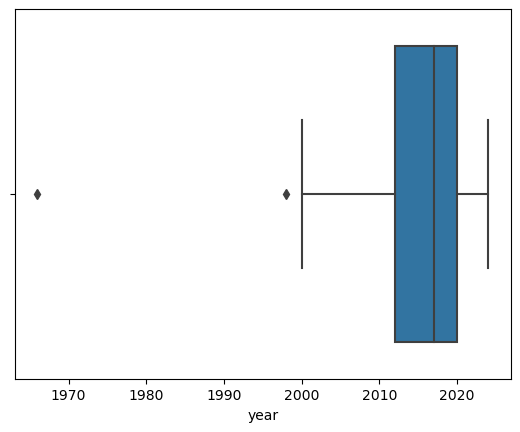

In [180]:
sns.boxplot(data['year'])

In [181]:
data.isnull().sum()

reviewId              0
creationDate          0
criticName           88
criticPageUrl        88
reviewState           0
isFresh               0
isRotten              0
isRtUrl             629
isTopCritic           0
publicationUrl        0
publicationName       0
reviewUrl          2065
quote               189
scoreSentiment        0
originalScore         0
movieId               0
year                  0
month                 0
day                   0
dtype: int64

In [182]:
data = data.dropna(subset=['isRtUrl'])

In [183]:
data = data.dropna(subset=['reviewUrl'])

In [184]:
data = data.dropna(subset=['quote'])

In [185]:
data

,reviewId,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,scoreSentiment,originalScore,movieId,year,month,day
1,1895073,1998-08-21,Scott Nash,/critics/scott-nash,fresh,True,False,False,False,/critics/source/1465,Three Movie Buffs,http://www.threemoviebuffs.com/review/blade,It's stylish and fast-paced. It's also a lot o...,POSITIVE,3/4,4128b2f6-8c69-396a-a83d-0d44eb90e5f7,1998,8,21
2,25507,2000-01-01,Roger Ebert,/critics/roger-ebert,fresh,True,False,False,True,/critics/source/67,Chicago Sun-Times,http://www.rogerebert.com/reviews/the-rocketee...,"You have to dial down, to return to an age of ...",POSITIVE,3/4,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,2000,1,1
3,25508,2000-01-01,NaN,NaN,rotten,False,True,False,True,/critics/source/148,Empire Magazine,http://www.empireonline.com/reviews/reviewcomp...,Reaches for the skies but runs out of fuel.,NEGATIVE,2/5,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,2000,1,1
4,25509,2000-01-01,Joe Brown,/critics/joe-brown,fresh,True,False,False,True,/critics/source/474,Washington Post,http://www.washingtonpost.com/wp-srv/style/lon...,"Based on a comic book, deliciously corny but n...",POSITIVE,0.8,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,2000,1,1
5,25510,2000-01-01,Hal Hinson,/critics/hal-hinson,rotten,False,True,False,True,/critics/source/474,Washington Post,http://www.washingtonpost.com/wp-srv/style/lon...,"It's a humble little item, actually, easily di...",NEGATIVE,0.8,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,2000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27137,102921224,2024-06-14,Mat Brunet,/critics/mat-brunet,fresh,True,False,False,False,/critics/source/100009579,AniMat's Review (YouTube),https://youtu.be/ckNJciq0XUM,I know this is meant to show the first time th...,POSITIVE,6/10,e53e6850-82b5-3727-a768-d99df185a901,2024,6,14
27138,102921566,2024-06-15,Josh Larsen,/critics/josh-larsen,fresh,True,False,False,False,/critics/source/1959,LarsenOnFilm,https://larsenonfilm.com/the-crow,&#46;&#46;&#46; dark&#44; rainy&#44; and askew...,POSITIVE,3/4,da04703c-b0d8-3dee-8910-bc1387164fc1,2024,6,15
27139,102921714,2024-06-17,Casey Chong,/critics/casey-chong,fresh,True,False,False,False,/critics/source/3688,Casey's Movie Mania,https://www.caseymoviemania.com/batman-honey-i...,Jack Nicholson&#44; who received top billing a...,POSITIVE,3.5/5,f6f45d63-ea78-3139-985f-e5dc17caf85e,2024,6,17
27140,102923356,2024-06-24,Udita Jhunjhunwala,/critics/udita-jhunjhunwala,fresh,True,False,False,True,/critics/source/2785,Livemint,https://lifestyle.livemint.com/how-to-lounge/m...,Unlike the more recent superhero movies that a...,POSITIVE,0.8,10b522a5-873e-3e15-bd8b-65a079ab0b09,2024,6,24


In [186]:
data = data.dropna(subset=['criticPageUrl'])

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24968 entries, 1 to 27141
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   reviewId         24968 non-null  int64         
 1   creationDate     24968 non-null  datetime64[ns]
 2   criticName       24968 non-null  object        
 3   criticPageUrl    24968 non-null  object        
 4   reviewState      24968 non-null  object        
 5   isFresh          24968 non-null  bool          
 6   isRotten         24968 non-null  bool          
 7   isRtUrl          24968 non-null  object        
 8   isTopCritic      24968 non-null  bool          
 9   publicationUrl   24968 non-null  object        
 10  publicationName  24968 non-null  object        
 11  reviewUrl        24968 non-null  object        
 12  quote            24968 non-null  object        
 13  scoreSentiment   24968 non-null  object        
 14  originalScore    24968 non-null  objec

In [188]:
data[data['reviewId'] == 25510]

,reviewId,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,scoreSentiment,originalScore,movieId,year,month,day
5,25510,2000-01-01,Hal Hinson,/critics/hal-hinson,rotten,False,True,False,True,/critics/source/474,Washington Post,http://www.washingtonpost.com/wp-srv/style/lon...,"It's a humble little item, actually, easily di...",NEGATIVE,0.8,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,2000,1,1


<AxesSubplot:xlabel='month', ylabel='Count'>

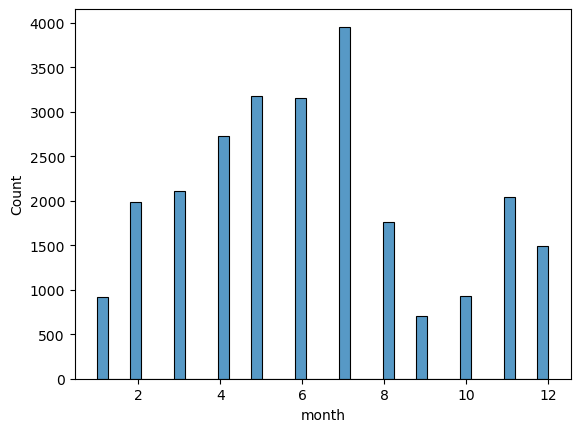

In [189]:
sns.histplot(data.month)

In [190]:
data.columns

Index(['reviewId', 'creationDate', 'criticName', 'criticPageUrl',
       'reviewState', 'isFresh', 'isRotten', 'isRtUrl', 'isTopCritic',
       'publicationUrl', 'publicationName', 'reviewUrl', 'quote',
       'scoreSentiment', 'originalScore', 'movieId', 'year', 'month', 'day'],
      dtype='object')

In [191]:
data

,reviewId,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,scoreSentiment,originalScore,movieId,year,month,day
1,1895073,1998-08-21,Scott Nash,/critics/scott-nash,fresh,True,False,False,False,/critics/source/1465,Three Movie Buffs,http://www.threemoviebuffs.com/review/blade,It's stylish and fast-paced. It's also a lot o...,POSITIVE,3/4,4128b2f6-8c69-396a-a83d-0d44eb90e5f7,1998,8,21
2,25507,2000-01-01,Roger Ebert,/critics/roger-ebert,fresh,True,False,False,True,/critics/source/67,Chicago Sun-Times,http://www.rogerebert.com/reviews/the-rocketee...,"You have to dial down, to return to an age of ...",POSITIVE,3/4,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,2000,1,1
4,25509,2000-01-01,Joe Brown,/critics/joe-brown,fresh,True,False,False,True,/critics/source/474,Washington Post,http://www.washingtonpost.com/wp-srv/style/lon...,"Based on a comic book, deliciously corny but n...",POSITIVE,0.8,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,2000,1,1
5,25510,2000-01-01,Hal Hinson,/critics/hal-hinson,rotten,False,True,False,True,/critics/source/474,Washington Post,http://www.washingtonpost.com/wp-srv/style/lon...,"It's a humble little item, actually, easily di...",NEGATIVE,0.8,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,2000,1,1
6,25516,2000-01-01,Steve Rhodes,/critics/steve-rhodes,rotten,False,True,False,False,/critics/source/703,Internet Reviews,http://reviews.imdb.com/Reviews/77/7795,The problem with the film is that it is nothin...,NEGATIVE,2/4,01935e47-e735-30c3-b8bd-72a9dbbcfa8a,2000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27137,102921224,2024-06-14,Mat Brunet,/critics/mat-brunet,fresh,True,False,False,False,/critics/source/100009579,AniMat's Review (YouTube),https://youtu.be/ckNJciq0XUM,I know this is meant to show the first time th...,POSITIVE,6/10,e53e6850-82b5-3727-a768-d99df185a901,2024,6,14
27138,102921566,2024-06-15,Josh Larsen,/critics/josh-larsen,fresh,True,False,False,False,/critics/source/1959,LarsenOnFilm,https://larsenonfilm.com/the-crow,&#46;&#46;&#46; dark&#44; rainy&#44; and askew...,POSITIVE,3/4,da04703c-b0d8-3dee-8910-bc1387164fc1,2024,6,15
27139,102921714,2024-06-17,Casey Chong,/critics/casey-chong,fresh,True,False,False,False,/critics/source/3688,Casey's Movie Mania,https://www.caseymoviemania.com/batman-honey-i...,Jack Nicholson&#44; who received top billing a...,POSITIVE,3.5/5,f6f45d63-ea78-3139-985f-e5dc17caf85e,2024,6,17
27140,102923356,2024-06-24,Udita Jhunjhunwala,/critics/udita-jhunjhunwala,fresh,True,False,False,True,/critics/source/2785,Livemint,https://lifestyle.livemint.com/how-to-lounge/m...,Unlike the more recent superhero movies that a...,POSITIVE,0.8,10b522a5-873e-3e15-bd8b-65a079ab0b09,2024,6,24


In [192]:
px.box(data.month)

In [193]:
len(data[data['year'] > 2000])

24693

In [194]:
len(data[data['year'] < 2000])

1

In [195]:
data['reviewId'].max()

102923418

In [196]:
data['reviewId'].min()

1705

In [197]:
data[data['reviewId'] == 1705]

,reviewId,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,scoreSentiment,originalScore,movieId,year,month,day
397,1705,2000-01-01,Bob Thomas,/critics/bob-thomas,rotten,False,True,False,True,/critics/source/531,Associated Press,https://www.newspapers.com/article/the-charlot...,"Which way do you go: play it for laughs, like ...",NEGATIVE,0.8,f6f45d63-ea78-3139-985f-e5dc17caf85e,2000,1,1


In [198]:
data[data['reviewId'] == 102923418]

,reviewId,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,scoreSentiment,originalScore,movieId,year,month,day
27141,102923418,2024-06-24,Udita Jhunjhunwala,/critics/udita-jhunjhunwala,rotten,False,True,False,True,/critics/source/2785,Livemint,https://lifestyle.livemint.com/how-to-lounge/m...,"For a film about a very fast man, the narrativ...",NEGATIVE,0.8,7807e2b5-72d7-3dc7-8cd4-b9482b82fe01,2024,6,24


In [199]:
len(data[data['scoreSentiment'] == 'POSITIVE'])

20407

In [200]:
len(data[data['scoreSentiment'] == 'NEGATIVE'])

4561

In [201]:
data[data['publicationName'] == 'Livemint']

,reviewId,creationDate,criticName,criticPageUrl,reviewState,isFresh,isRotten,isRtUrl,isTopCritic,publicationUrl,publicationName,reviewUrl,quote,scoreSentiment,originalScore,movieId,year,month,day
19734,2609751,2019-07-29,Udita Jhunjhunwala,/critics/udita-jhunjhunwala,fresh,True,False,False,True,/critics/source/2785,Livemint,https://www.livemint.com/Consumer/geP3uehR9SIO...,"Bird laces in subliminal messages, but the mai...",POSITIVE,0.8,487e9820-001e-3da7-b47b-37003a7d7bc9,2019,7,29
19760,2612218,2019-08-05,Udita Jhunjhunwala,/critics/udita-jhunjhunwala,fresh,True,False,False,True,/critics/source/2785,Livemint,https://www.livemint.com/Leisure/DWTIRxnM7LV7e...,"The oversized and awkward, cute and caring Bay...",POSITIVE,0.8,b923270d-59e5-3def-b2ea-dcf1ee2f0698,2019,8,5
27140,102923356,2024-06-24,Udita Jhunjhunwala,/critics/udita-jhunjhunwala,fresh,True,False,False,True,/critics/source/2785,Livemint,https://lifestyle.livemint.com/how-to-lounge/m...,Unlike the more recent superhero movies that a...,POSITIVE,0.8,10b522a5-873e-3e15-bd8b-65a079ab0b09,2024,6,24
27141,102923418,2024-06-24,Udita Jhunjhunwala,/critics/udita-jhunjhunwala,rotten,False,True,False,True,/critics/source/2785,Livemint,https://lifestyle.livemint.com/how-to-lounge/m...,"For a film about a very fast man, the narrativ...",NEGATIVE,0.8,7807e2b5-72d7-3dc7-8cd4-b9482b82fe01,2024,6,24


In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24968 entries, 1 to 27141
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   reviewId         24968 non-null  int64         
 1   creationDate     24968 non-null  datetime64[ns]
 2   criticName       24968 non-null  object        
 3   criticPageUrl    24968 non-null  object        
 4   reviewState      24968 non-null  object        
 5   isFresh          24968 non-null  bool          
 6   isRotten         24968 non-null  bool          
 7   isRtUrl          24968 non-null  object        
 8   isTopCritic      24968 non-null  bool          
 9   publicationUrl   24968 non-null  object        
 10  publicationName  24968 non-null  object        
 11  reviewUrl        24968 non-null  object        
 12  quote            24968 non-null  object        
 13  scoreSentiment   24968 non-null  object        
 14  originalScore    24968 non-null  objec

In [203]:
data['originalScore']

1          3/4
2          3/4
4          0.8
5          0.8
6          2/4
         ...  
27137     6/10
27138      3/4
27139    3.5/5
27140      0.8
27141      0.8
Name: originalScore, Length: 24968, dtype: object

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24968 entries, 1 to 27141
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   reviewId         24968 non-null  int64         
 1   creationDate     24968 non-null  datetime64[ns]
 2   criticName       24968 non-null  object        
 3   criticPageUrl    24968 non-null  object        
 4   reviewState      24968 non-null  object        
 5   isFresh          24968 non-null  bool          
 6   isRotten         24968 non-null  bool          
 7   isRtUrl          24968 non-null  object        
 8   isTopCritic      24968 non-null  bool          
 9   publicationUrl   24968 non-null  object        
 10  publicationName  24968 non-null  object        
 11  reviewUrl        24968 non-null  object        
 12  quote            24968 non-null  object        
 13  scoreSentiment   24968 non-null  object        
 14  originalScore    24968 non-null  objec

In [222]:
isFresh_counts = data['isFresh'].value_counts()
isFresh_counts

True     20407
False     4561
Name: isFresh, dtype: int64

In [223]:
percentage = data['isFresh'].value_counts(normalize=True) * 100
percentage


True     81.732618
False    18.267382
Name: isFresh, dtype: float64

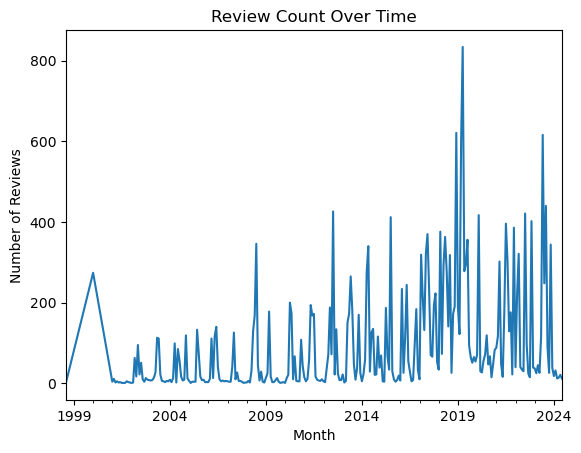

In [242]:
data['creationDate'].groupby(data['creationDate'].dt.to_period('M')).count().plot(kind='line')
plt.title('Review Count Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()


In [225]:
top_critic_counts = data[data['isTopCritic'] == True]['criticName'].value_counts()
top_critic_counts

Nell Minow             67
Peter Bradshaw         64
Steven D. Greydanus    58
Peter Travers          55
Mick LaSalle           54
                       ..
Kenji Fujishima         1
Tim Goodman             1
Ben Rayner              1
John Krewson            1
Brandon Ambrosino       1
Name: criticName, Length: 655, dtype: int64

In [226]:
top_critic = data[data['isTopCritic'] == True]['isFresh'].value_counts(normalize=True) * 100
top_critic

True     75.32629
False    24.67371
Name: isFresh, dtype: float64

In [235]:
sentiment = data[data['scoreSentiment'] == 'POSITIVE']['originalScore'].value_counts(normalize = True) *100

In [237]:
sentiment.sum()

100.0